<a href="https://colab.research.google.com/github/Todmount/KHAI_MLcourse/blob/PR8/Task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика №8
## Логістична регресія

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# імпорт необхідних бібліотек
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

В рамках завдання є набір даних (**hearing_test.csv**), який представляє собою результати дослідження, під час якого оцінювалися фізичні здібності учасників, а потім вони проходили аудіотест (*пройшов/не пройшов*), який оцінював їх здатність чути високі частоти. Також зазначався вік учасника. Мета дослідження - вивчити вплив віку і фізичного здоров’я на втрату слуху, зокрема на здатність чути високі тони. Прийняло участь всього 5000 учасників.

Отже необхідно побудувати модель, яка б передбачила чиюсь ймовірність почути високочастотний звук виключно на основі їх показників (тобто віку і фізичних показників).

* Ознаки

    * age - вік учасника в роках
    * physical_score - оцінка, отримана під час обстеження

* Мітка

    * test_result - 0, якщо тест не пройдено, 1, якщо тест пройдено

In [3]:
# зчитайте дані з файлу hearing_test.csv
df_data = pd.read_csv('/content/drive/My Drive/hearing_test.csv')

In [4]:
# виведіть перші 5 рядків
print(df_data.head())

    age  physical_score  test_result
0  33.0            40.7            1
1  50.0            37.2            1
2  52.0            24.7            0
3  56.0            31.0            0
4  35.0            42.9            1


отримайте кількість тих, хто пройшов і не пройшов тест (див. метод [value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html))

In [14]:
# виведіть результат
test_count = df_data['test_result'].value_counts(dropna=False)
print(test_count)

1    3000
0    2000
Name: test_result, dtype: int64


Побудуйте діаграми розсіювання (*plt.scatter*) для *physical_score* і *test_result*, а також для *age* і *test_result*.
Скористайтеся функцією scatter наступним чином:
**plt.scatter(x='назва стовпця1', y='назва стовпця2', data=назва_dataframe)**

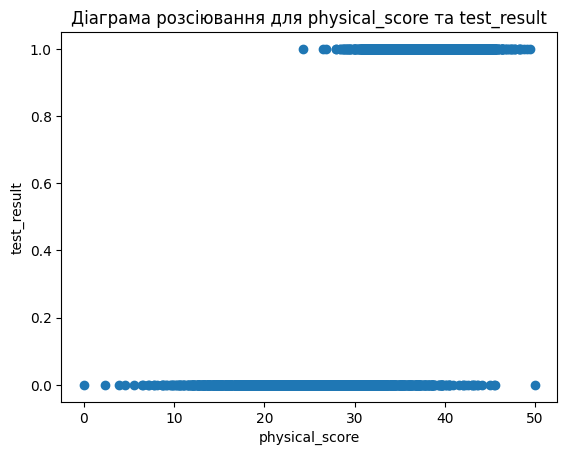

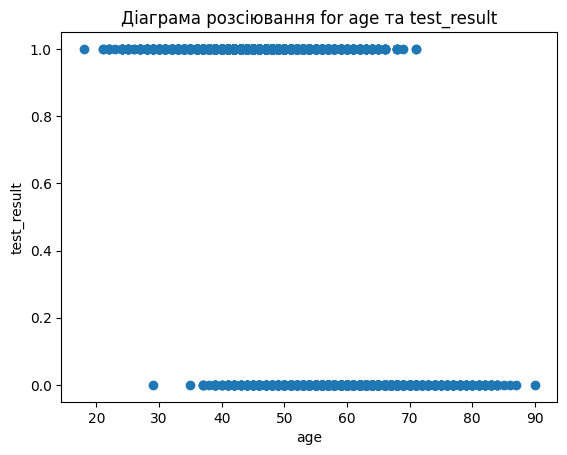

In [31]:
# побудуйте діаграми розсіювання

# Діаграма розсіювання для physical_score і test_result
plt.scatter(x='physical_score', y='test_result', data=df_data)
plt.title('Діаграма розсіювання для physical_score та test_result')
plt.xlabel('physical_score')
plt.ylabel('test_result')
plt.show()

# Діаграма розсіювання для age і test_result
plt.scatter(x='age', y='test_result', data=df_data)
plt.title('Діаграма розсіювання for age та test_result')
plt.xlabel('age')
plt.ylabel('test_result')
plt.show()

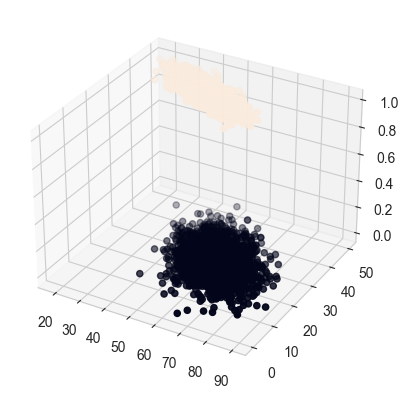

In [ ]:
# побудова тривімірної діаграми розсіювання для даних
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

Сформуйте матрицю $X$ і вектор міток $y$. Для отримання матриці $X$ (це дані, на яких буде навчатися модель) необхідно з отриманого раніше dataframe видалити стовпець **test_result** (див. метод *drop* і зверніть увагу на параметр *axis*, оскільки необхідно видалити саме стовпці). Вектором $y$ повинен бути лише стовпець **test_result** з отриманого раніше dataframe.

In [16]:
# отримання матриці X і ветору меток y

# Видалення стовпця test_result для отримання матриці X
X = df_data.drop('test_result', axis=1)

# Отримання вектора y (стовпець test_result)
y = df_data['test_result']

# Виведення перших 5 рядків матриці X і вектора y
print("Матриця X:")
print(X.head())
print("\nВектор y:")
print(y.head())

Матриця X:
    age  physical_score
0  33.0            40.7
1  50.0            37.2
2  52.0            24.7
3  56.0            31.0
4  35.0            42.9

Вектор y:
0    1
1    1
2    0
3    0
4    1
Name: test_result, dtype: int64


In [17]:
# Стандартизація ознак за допомогою функції StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [22]:
# Навчіть модель логістичної регресії
model = LogisticRegression()
model.fit(scaled_X, y)

LogisticRegression()

In [23]:
# застосуйте навчену модель до даних X (використайте метод predict)
predictions = model.predict(scaled_X)

In [29]:
# виведіть результат точності класифікації за допомогою метрики Accuracy (див. функцію accuracy_score)
accuracy = accuracy_score(y, predictions)
print("Точність класифікації: {:.2f}%".format(accuracy * 100))

Точність класифікації: 91.52%
